## **4.3.&emsp;Entrenar el modelo**
#### **4.3.1.&emsp;Entrenamiento**
>Luego de haber realizado el feature selection, se procede a entrenar el modelo sin las columnas antes mencionadas

In [46]:
import numpy as np              # Para operaciones matematicas
import pandas as pd             # Manejo de datos / dataframes
from sys import getsizeof       # Operaciones de sistema
%matplotlib inline

In [47]:
data_raw = '../data/raw'              # directorio que contiene toda la data sin manipular
data_processed = '../data/processed'  # directorio que contiene data procesada

In [48]:
df_students = pd.read_csv(data_processed+"/df_students.csv")
df_students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,0
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,19,0,0,1,2,3,3,2,...,4,2,1,2,5,4,10,11,10,0
1040,1,0,18,1,1,1,3,1,4,3,...,3,4,1,1,1,4,15,15,16,1
1041,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,5,6,11,12,9,0
1042,1,1,17,1,1,1,3,1,3,3,...,4,5,3,4,2,6,10,10,10,0


In [49]:
#-------------------------- Regression Model ------------------------#
from sklearn import linear_model                                     #
from sklearn import model_selection                                  #
from sklearn.model_selection import train_test_split                 #
from sklearn.feature_selection import RFE                            #
from sklearn.preprocessing import MinMaxScaler                       #
from sklearn.metrics import classification_report                    #
from sklearn.metrics import confusion_matrix                         #
from sklearn.metrics import accuracy_score                           #
#--------------------------------------------------------------------#
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

In [50]:
#X = df_students.drop(['G3','class'],axis=1)

X = df_students[['failures', 'schoolsup', 'paid', 'nursery',
                'freetime', 'Dalc', 'absences', 'G1', 'studytime', 'goout']]

y = df_students['G3']

scaler = MinMaxScaler()
tmp = scaler.fit_transform(X)
X = pd.DataFrame(tmp, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                 test_size=.25,
                                                 #stratify=y,
                                                 random_state=1)

X_train.shape,X_test.shape

((783, 10), (261, 10))

## Accuracy score is only for classification problems. For regression problems you can use: R2 Score, MSE (Mean Squared Error), RMSE (Root Mean Squared Error).
r2, neg_mean_squared_error

In [51]:
# Perform Grid-Search
clf = SVR(max_iter=5000)

parameters = {                       
    "kernel": ['poly', 'rbf', 'sigmoid'],
    "C": [1e2, 1e3, 1e4, 1e5, 1e6, 1e7],                                                      
    "gamma": np.logspace(-2, 2, 5),
    "epsilon": [0.1, 0.2, 0.3, 0.5, 1]
}

# clf_svc = RandomizedSearchCV(clf_svc, param_distributions=parameters, scoring="accuracy", cv=5, n_jobs=-1, n_iter=15)
clf = GridSearchCV(clf, param_grid=parameters, scoring="r2", cv=5, n_jobs=-1)
model_svc = clf.fit(X_train, y_train)

#print ("R2 score:", r2(y_test,y_predict))
print("Best score : ", model_svc.best_score_)
print("Best Parameters : ", model_svc.best_params_)
#print("Accuracy Score : ", accuracy_score(model_svc.predict(X_test), y_test))
print("Training Accuracy : ", model_svc.score(X_train, y_train))
print("Test Accuracy : ", model_svc.score(X_test, y_test))

Best score :  0.646923928357042
Best Parameters :  {'C': 1000.0, 'epsilon': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}
Training Accuracy :  0.6653997942838752
Test Accuracy :  0.6206712034359453


d:\archivos de programa\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
d:\archivos de programa\python37\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


## Entrenando el modelo

In [52]:
svr = SVR(kernel='rbf', C=1000, gamma=0.01,
                           epsilon=0.5)

model = svr.fit(X_train, y_train)

predictions = model.predict(X_test)

In [53]:
print("Training score : ", model.score(X_train, y_train))
print("Test score : ", model.score(X_test, y_test))

Training score :  0.6652371978777265
Test score :  0.6205598975171139


## **4.4.&emsp;Evaluando el modelo**
#### **4.4.1.&emsp;Metricas**

In [54]:
from sklearn import metrics

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.4354151389119936
Mean Squared Error: 5.590287169807975
Root Mean Squared Error: 2.3643788126710947


#### **4.4.2.&emsp;Visualizacion**

In [56]:
import seaborn
import matplotlib.pyplot as matplotlib

from matplotlib.lines import Line2D
from scipy.stats import pearsonr

In [57]:
def simple_scatter_plot(x_data, y_data, output_filename, title_name, x_axis_label, y_axis_label):
    """Simple scatter plot.
 
    Args:
        x_data (list): List with x-axis data.
        y_data (list): List with y-axis data.
        output_filename (str): Path to output image in PNG format.
        title_name (int): Plot title.
        x_axis_label (str): X-axis Label.
        y_axis_label (str): Y-axis Label.
 
    """
    seaborn.set(color_codes=True)
    matplotlib.figure(1, figsize=(9, 6))
 
    matplotlib.title(title_name)
 
    ax = seaborn.scatterplot(x=x_data, y=y_data)
 
    ax.set(xlabel=x_axis_label, ylabel=y_axis_label)
 
    matplotlib.savefig(output_filename, bbox_inches='tight', dpi=300)
    matplotlib.show()
    matplotlib.close()

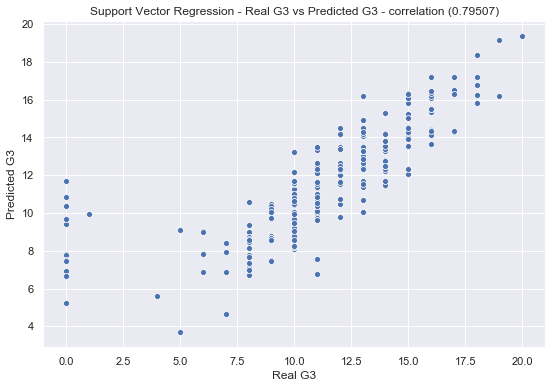

In [58]:
# find the correlation between real answer and prediction
correlation = round(pearsonr(predictions, y_test)[0], 5)
 
output_filename = "sv_regression.png"
title_name = "Support Vector Regression - Real G3 vs Predicted G3 - correlation ({})".format(correlation)
x_axis_label = "Real G3"
y_axis_label = "Predicted G3"
 
# plot data
simple_scatter_plot(y_test, predictions, output_filename, title_name, x_axis_label, y_axis_label)

#### **4.4.3.&emsp;Feature Importance**

In [59]:
import seaborn as sn
import matplotlib.pyplot as plt

The feature importance of linear SVMs could be found out but not for a nonlinear SVMs, the reason being that, when the SVM is non-linear the dataset is mapped into a space of higher dimension, which is quite different from the parent dataset and the hyperplane is obtained and this high dimensional data and hence the property is changed from that of the parent dataset and hence it is not possible to find the feature importance of this SVM in relation to the parent dataset features.

#### **4.4.4.&emsp;Re-evaluating the model**

In [60]:
#X = df_students.drop(['G3','class'],axis=1)

X = df_students[['failures','absences', 'G1', 'goout']]

y = df_students['G3']

scaler = MinMaxScaler()
tmp = scaler.fit_transform(X)
X = pd.DataFrame(tmp, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                 test_size=.25,
                                                 #stratify=y,
                                                 random_state=1)

X_train.shape,X_test.shape

((783, 4), (261, 4))

In [61]:
svr = SVR(kernel='rbf', C=1000, gamma=0.01,
                           epsilon=0.5)

model = svr.fit(X_train, y_train)

predictions = model.predict(X_test)

In [62]:
print("Training score : ", model.score(X_train, y_train))
print("Test score : ", model.score(X_test, y_test))

Training score :  0.6563350781330606
Test score :  0.6185560613458017


In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.4717266680825134
Mean Squared Error: 5.619809667734745
Root Mean Squared Error: 2.370613774475873
